<a href="https://colab.research.google.com/github/AbuNuurah/Ede-indigenous-man/blob/master/BiLSTM%26BiGRUMod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumer Price Index (CPI) and Inflation Rate

## Import libraries

In [ ]:
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(1234)

## Read and explore data
While I import the data from a CSV file, I make sure the Date column has the correct DateTime format by parse_dates = ['Date'].

When I work with date and time, it becomes much easier if I set Date column as the dataframe index.


In [ ]:
file = 'cpi.csv'
raw_data = pd.read_csv(file, parse_dates = ['Date'], index_col = 'Date')

df = raw_data.copy()

In [ ]:
# Explore the first five rows
df.head()

,MonthlyCPI
Date,
1970-01-01,0.09
1970-02-01,0.09
1970-03-01,0.09
1970-04-01,0.10
1970-05-01,0.10


In [ ]:
# Data description

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MonthlyCPI,425.0,76.445365,84.094359,0.09,0.41,44.34,120.27,322.17


In [ ]:
from matplotlib import pyplot

import matplotlib.pyplot as plt

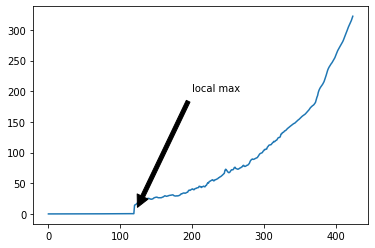

In [ ]:
ax = plt.subplot(111)


line, = plt.plot(df.values)

plt.annotate('local max', xy=(120, 1), xytext=(200, 200),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

#plt.ylim(-2, 2)
plt.show()

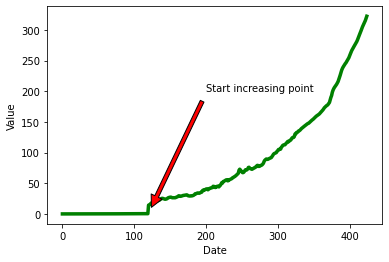

In [ ]:
ax = plt.subplot(111)


line, = plt.plot(df.values, color='green', linewidth=3.5, marker='')

plt.annotate('Start increasing point', xy=(120, 1), xytext=(200, 200),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )

ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.show()

No handles with labels found to put in legend.


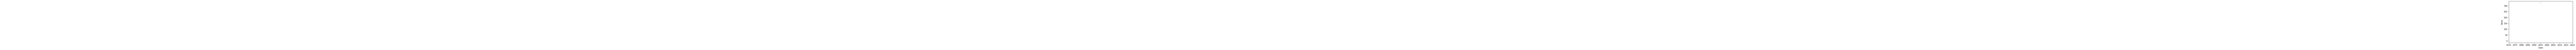

In [ ]:
import pandas as pd
import matplotlib.transforms as mtransforms
import numpy as np
file = 'cpi.csv'
raw_data = pd.read_csv(file, parse_dates = ['Date'], index_col = 'Date')

ma = raw_data.rolling('90d').mean()

cmap = plt.get_cmap('RdYlGn_r')
ax = plt.subplot(111)
#ma.plot(color='green', linewidth=2.5, marker='') #, figsize=(8, 8),
 #       label='VIX 90d MA')
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('Date')
ax.set_ylabel('Value')
#ax.set_title('All Item')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])


#ax = plt.subplot(111)


line, = plt.plot(df.values, color='green', linewidth=2.5, marker='')

plt.annotate('local max', xy=(120, 1), xytext=(200, 200),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

#plt.ylim(-2, 2)
plt.show()

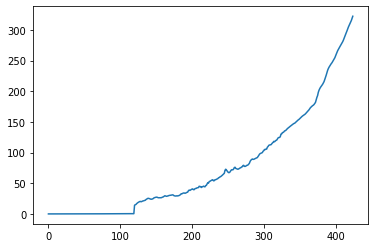

In [ ]:
pyplot.plot(df.values)
pyplot.show()


(719163.0, 737546.0)

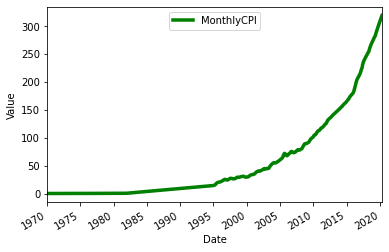

In [ ]:
import pandas as pd
import matplotlib.transforms as mtransforms
import numpy as np
file = 'cpi.csv'
raw_data = pd.read_csv(file, parse_dates = ['Date'], index_col = 'Date')

#def cut(x, bins, right: bool=True, labels=None, retbins: bool=False, precision: int=3, include_lowest: bool=False, duplicates: str='raise', ordered: bool=True)

ma = raw_data.rolling('90d').mean()
#state = pd.cut(ma, bins= 3)
#               labels=range(4),retbins=True)
#state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
#               labels=range(4),retbins=True)
#pd.cut(s, [0, 2, 4, 6, 10, 10], labels=False, retbins=True,
#       right=False, duplicates='drop')
cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='green', linewidth=3.5, marker='') #, figsize=(8, 8),
 #       label='VIX 90d MA')
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('Date')
ax.set_ylabel('Value')
#ax.set_title('All Item')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

#trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
 #   ax.fill_between(ma.index, 0, 1, where=state==i,
  #                  facecolor=color, transform=trans)
#ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
 #          alpha=0.6, label='Full-period mean', marker='')

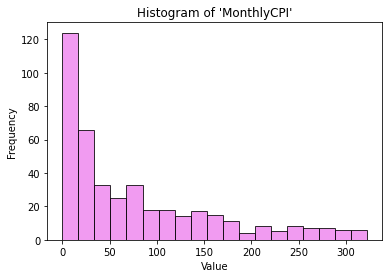

In [ ]:
def plot_histogram(x):
    plt.hist(x, bins = 19, alpha=0.8, color = 'Violet', edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plot_histogram(df['MonthlyCPI'])

# Data pre-processing


### Replace outliers
I use statistical methods to detect outliers. The statistical methods assume a normal distribution of data points. Therefore, values in a low probability region are considered as outliers.

I apply the concept of maximum likelihood in the statistical methods meaning that values outside the range of μ±2σ are labelled as an outlier. Note that μ±2σ contains 95% of data under the assumption of normal distribution.

In [ ]:
# Outlier detection
up_b = df['MonthlyCPI'].mean() + 2*df['MonthlyCPI'].std()
low_b = df['MonthlyCPI'].mean() - 2*df['MonthlyCPI'].std()

# Replace outlier by interpolation for base consumption
df.loc[df['MonthlyCPI'] > up_b, 'MonthlyCPI'] = np.nan
df.loc[df['MonthlyCPI'] < low_b, 'MonthlyCPI'] = np.nan
df['MonthlyCPI'].interpolate(inplace=True)

RESHAP

In [ ]:
df = np.array(df).reshape((-1, 1))

Normalizing the data using minmax scaler

In [ ]:
from sklearn import preprocessing
# normalize features - 

scaler = MinMaxScaler(feature_range=(0.09, 322.17))
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled)

Fixing the moving window size to be 4. For this purpose we use pandas shift function that shifts the entire column by the number we specify.

In [ ]:
# Fix the moving window size to be 4
window_size = 4

df1 = df.copy()
for i in range(window_size):
    df = pd.concat([df, df1.shift(-(i+1))], axis = 1)
 # I dropped all the rows that contain the Nan values in the code snippet.   
df.dropna(axis=0, inplace=True)

In [ ]:
df.head()

,0,0,0,0,0
0,0.090000,0.090000,0.090000,0.103258,0.103258
1,0.090000,0.090000,0.103258,0.103258,0.090000
2,0.090000,0.103258,0.103258,0.090000,0.103258
3,0.103258,0.103258,0.090000,0.103258,0.103258
4,0.103258,0.090000,0.103258,0.103258,0.103258


In [ ]:
df.columns=('CPI1', 'CPI2','CPI3', 'CPI4','CPI5')

In [ ]:
df.columns

Index(['CPI1', 'CPI2', 'CPI3', 'CPI4', 'CPI5'], dtype='object')

In [ ]:
df.head()

,CPI1,CPI2,CPI3,CPI4,CPI5
0,0.090000,0.090000,0.090000,0.103258,0.103258
1,0.090000,0.090000,0.103258,0.103258,0.090000
2,0.090000,0.103258,0.103258,0.090000,0.103258
3,0.103258,0.103258,0.090000,0.103258,0.103258
4,0.103258,0.090000,0.103258,0.103258,0.103258


## Split the dataset into train and test data
In this project, I set the first 80% of data as train data and the remaining 20% as test data. I train the model with train data and validate its performance with test data

Dimension of train data:  (336, 5)
Dimension of test data:  (85, 5)


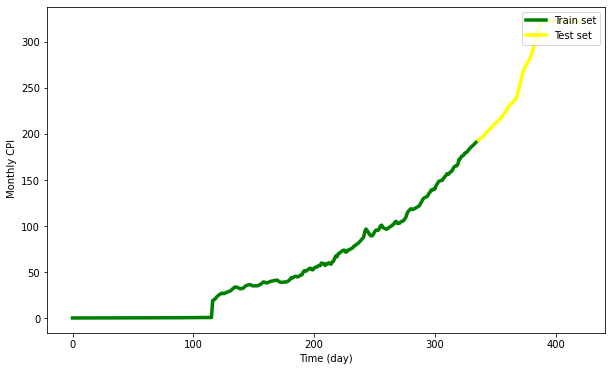

In [ ]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size], df.iloc[train_size:]

#Plot train and test data
#plt.figure(figsize = (10, 6))
plt.plot(train_dataset.CPI5, color='green', linewidth=3.5, marker='')
plt.plot(test_dataset.CPI5, color='yellow', linewidth=3.5, marker='')
plt.xlabel('Time (day)')
plt.ylabel(' Monthly CPI')
plt.legend(['Train set', 'Test set'], loc='upper right')
#line, = plt.plot(df.values, color='green', linewidth=3.5, marker='')

print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

### Split the target variable and dependent variables
CPI5 is the target variable (output) and is a function of dependent variables (input); CPI1, CPI2 CPI3 and CPI4

In [ ]:
# Split train data to X and y
X_train = train_dataset.drop('CPI5', axis = 1)
y_train = train_dataset.loc[:,['CPI5']]

# Split test data to X and y
X_test = test_dataset.drop('CPI5', axis = 1)
y_test = test_dataset.loc[:,['CPI5']]

In [ ]:
X_train.shape

(336, 4)

In [ ]:
y_train.shape


(336, 1)

In [ ]:
X_test.shape

(85, 4)

In [ ]:
y_test.shape

(85, 1)

In [ ]:

# Transform X_train, y_train, X_test and y_test

# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

Create a 3D Input Dataset
LSTM, GRU and BiLSTM take a 3D input (num_samples, num_timesteps, num_features). So, I create a helper function, create_dataset, to reshape input.

In this project, I define time_steps = 5. It means that the model makes predictions based on the last 5-month data (In the first iteration of the for-loop, the input carries the first 5 months and the output is CPI5 on the 5th month).

In [ ]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 5

X_test, y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_train.shape)

X_train.shape:  (80, 5, 4)
y_train.shape:  (331, 1)
X_test.shape:  (80, 5, 4)
y_test.shape:  (331, 1)


### Create BiLSTM, BiGRU, LSTM and GRU model
The first function, create_model_bilstmgru, creates a BDLSM and gets the number of units (neurons) in hidden layers. The second function, create_model, gets two inputs; number of units in hidden layers and model name (LSTM or GRU).

For the sake of simplicity, BiLSTM, LSTM and GRU have 2 hidden layers including 64 neurons and 1 neuron in the output layer.

To make the LSTM and GRU networks robust to changes, the Dropout function is used. Dropout(0.2) randomly drops 20% of units from the network.

In [ ]:
# Create BiLSTM or BiGRU model
def create_model_bilstmgru(units, q):
    model = Sequential()
    # First layer of BiLSTM or BiGRU
    model.add(Bidirectional(q(units = units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Second layer of BiLSTM or BiGRU
    model.add(Bidirectional(q(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, 
                 input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Second layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# BiLSTM and BiGRU
model_bilstm = create_model_bilstmgru(64, LSTM)
model_bigru = create_model_bilstmgru(64, GRU)

# GRU and LSTM 
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

## Fit the models
I train the model with train data for 100 epoch and batch_size = 32. I get the model to use 20% of train data as validation data. It is important to set shuffle = False because the order of the data matters in our project.

To avoid overfitting, I set an early stop to stop training when "val_loss" has not improved after 10 epochs (patience = 10).

In [ ]:
# Fit BiLSTM, BiGRU, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

history_bilstm = fit_model(model_bilstm)
history_bigru = fit_model(model_bigru)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/100
9/9 [==============================] - 8s 203ms/step - loss: 0.0084 - val_loss: 0.0093
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0134 - val_loss: 0.0088
Epoch 3/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0041 - val_loss: 0.0934
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0018 - val_loss: 0.0206
Epoch 5/100
9/9 [==============================] - 1s 83ms/step - loss: 7.7698e-04 - val_loss: 9.3649e-04
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 7/100
9/9 [==============================] - 0s 23ms/step - loss: 4.4045e-04 - val_loss: 0.0053
Epoch 8/100
9/9 [==============================] - 0s 24ms/step - loss: 2.4885e-04 - val_loss: 9.7092e-04
Epoch 9/100
9/9 [==============================] - 0s 19ms/step - loss: 2.5143e-04 - val_loss: 4.5749e-04
Epoch 10/100
9/9 [==============================] - 0s 21ms/step - loss: 2.4242e-04 - val

# Plot train loss vs validation loss

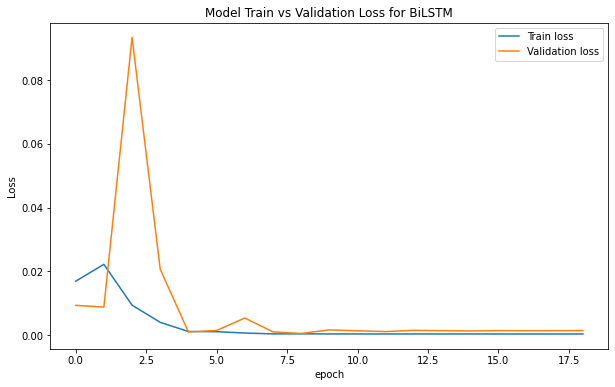

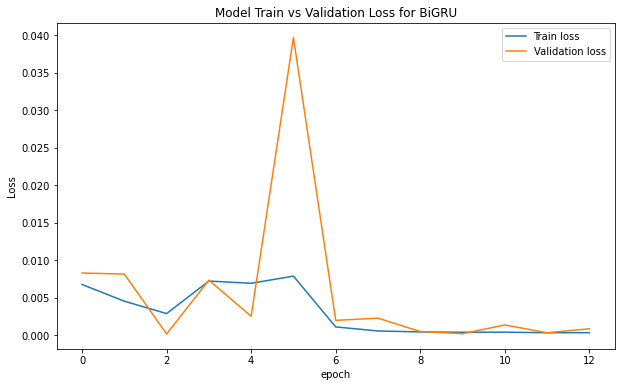

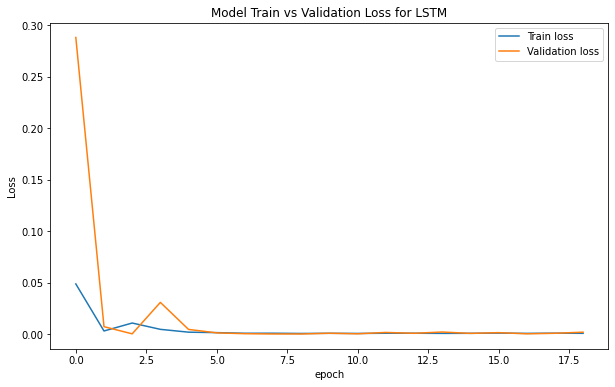

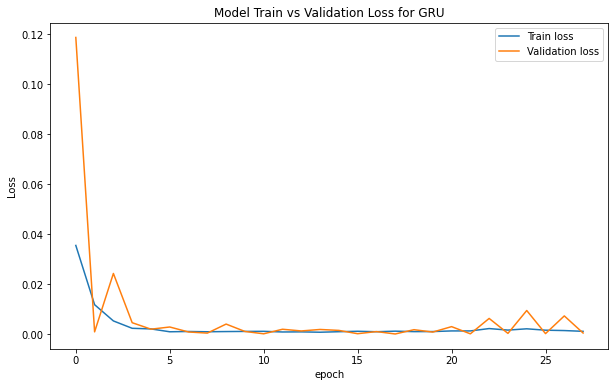

In [ ]:
def plot_loss (history, model_name):
    #plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 

plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_bigru, 'BiGRU')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')

# Inverse target variable for train and test data
After building the model, I have to transform the target variable back to original data space for train and test data using scaler_y.inverse_transform.

In [ ]:
# Note that I have to use scaler_y
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

### Make prediction using BiLSTM, LSTM and GRU
Here I predict MonthlyCPI using BiLSTM, LSTM and GRU models. Then, I plot true future vs prediction the three models.

In [ ]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_bigru = prediction(model_bigru)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

## Plot true future vs prediction

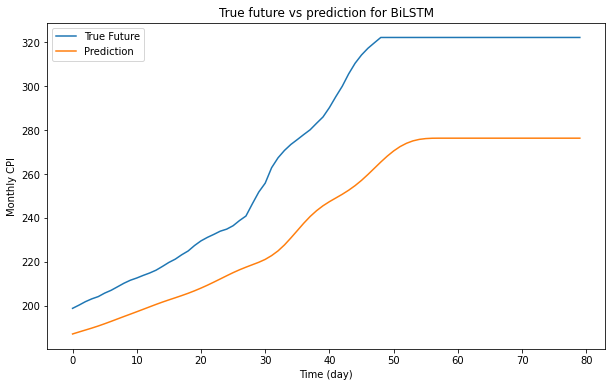

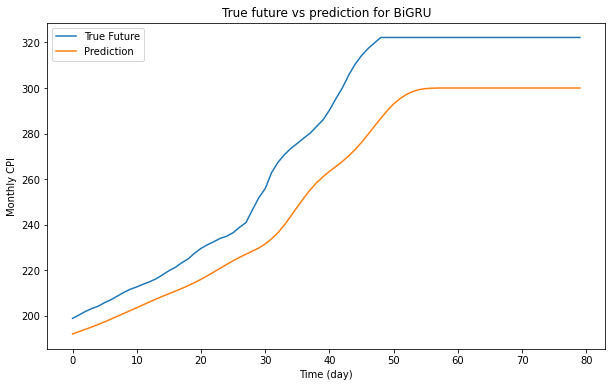

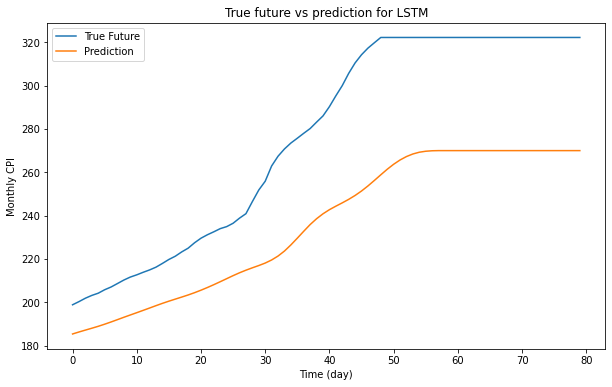

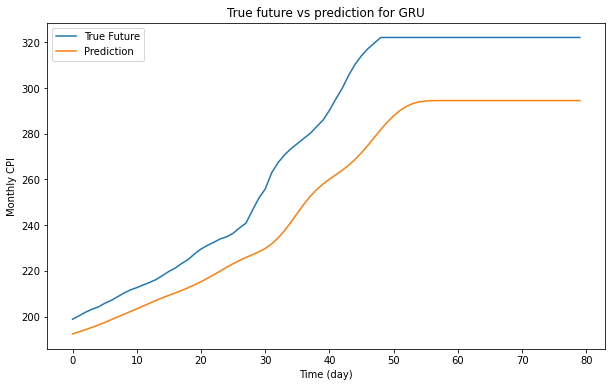

In [ ]:
def plot_future(prediction, model_name, y_test):
    
    #plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Monthly CPI')
   
    
    
plot_future(prediction_bilstm, 'BiLSTM', y_test)
plot_future(prediction_bigru, 'BiGRU', y_test)
plot_future(prediction_lstm, 'LSTM', y_test)
plot_future(prediction_gru, 'GRU', y_test)

In [ ]:


# Define a function to calculate Metrics
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    
    mape = np.mean(np.abs(errors)/np.abs(actual))
    wmape = np.sum(np.abs(errors))/np.sum(actual)
    mda = np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predictions[1:] - predictions[:-1])).astype(int))

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('Weighted Mean Absolute Percentage Error: {:.4f}'.format(wmape))
    print('Mean Absolute Percentage Error: {:.4f}'.format(mape))
    print('Mean Directional Accuracy: {:.4f}'.format(mda))
    print('')






evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_bigru, y_test, 'Bidirectional GRU')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')

Bidirectional LSTM:
Mean Absolute Error: 35.8254
Root Mean Square Error: 38.6572
Weighted Mean Absolute Percentage Error: 0.1296
Mean Absolute Percentage Error: 0.1241
Mean Directional Accuracy: 0.8861

Bidirectional GRU:
Mean Absolute Error: 20.3505
Root Mean Square Error: 22.0576
Weighted Mean Absolute Percentage Error: 0.0736
Mean Absolute Percentage Error: 0.0712
Mean Directional Accuracy: 0.8861

LSTM:
Mean Absolute Error: 40.3287
Root Mean Square Error: 43.4997
Weighted Mean Absolute Percentage Error: 0.1459
Mean Absolute Percentage Error: 0.1397
Mean Directional Accuracy: 0.8861

GRU:
Mean Absolute Error: 23.3491
Root Mean Square Error: 25.4782
Weighted Mean Absolute Percentage Error: 0.0845
Mean Absolute Percentage Error: 0.0809
Mean Directional Accuracy: 0.8861

